## Imoprt Necessary Libraries

In [3]:
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
import pandas as pd

In [5]:
Salary_Data = pd.read_csv("Salary_Data.csv")
Salary_Data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## Initial Investigation

In [6]:
Salary_Data.shape

(30, 2)

In [7]:
Salary_Data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [8]:
Salary_Data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [9]:
Salary_Data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


## Assumptions Cheak

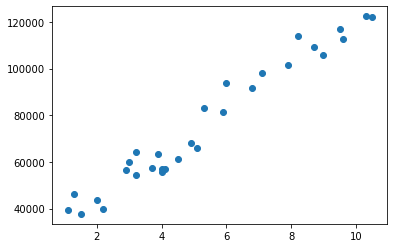

In [11]:
plt.scatter(x = 'YearsExperience', y = 'Salary',data=Salary_Data)

In [12]:
Salary_Data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


## Model Buildind and Model Training

### Liner regression with Statsmodels

In [14]:
model = smf.ols('Salary~YearsExperience',data = Salary_Data).fit()

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

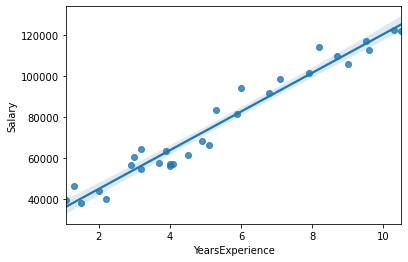

In [15]:
sns.regplot(x='YearsExperience',y='Salary',data=Salary_Data)

In [16]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

## Model Testing

In [17]:
Test_data = pd.DataFrame({'YearsExperience' : [1.9,5.2,5,4,3.6,4.8,5.6,7,2.2,1.2] })

In [18]:
Test_data

,YearsExperience
0,1.9
1,5.2
2,5.0
3,4.0
4,3.6
5,4.8
6,5.6
7,7.0
8,2.2
9,1.2


In [20]:
round(model.predict(Test_data),2)

0    43747.13
1    74932.00
2    73042.01
3    63592.05
4    59812.06
5    71152.02
6    78711.99
7    91941.94
8    46582.12
9    37132.15
dtype: float64

## Model Evaluation

In [21]:
model.aic , model.rsquared

(606.882316930432, 0.9569566641435086)

## Model Depolyment

In [22]:
from pickle import dump

In [23]:
dump(model,open('Salary Hike.pkl','wb'))

In [24]:
from pickle import load

In [25]:
loaded_model = load(open('Salary Hike.pkl','rb'))

In [26]:
loaded_model.predict(Test_data)

0    43747.128609
1    74932.004270
2    73042.011806
3    63592.049484
4    59812.064556
5    71152.019342
6    78711.989199
7    91941.936449
8    46582.117306
9    37132.154984
dtype: float64